In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**해당 노트의 키워드**

1. 변수 별 다양한 시각화 방식 : 특히 plotly 를 활용한 부분
   - TV show 콘텐츠와 영화 콘텐츠를 비교분석
   - TV show 의 특징 분석 
   - 영화 작품의 특징 분석 
   
2. 콘텐츠 기반 필터링 방식의 추천 시스템 구현 
   - TF-IDF : 텍스트 벡터화 방식
   - Cosine similarity : 행렬 유사도 계산 -- 추천 시스템


## A. Data Loading 

In [2]:
netflix_overall = pd.read_csv('netflix_titles.csv')
netflix_overall.head()

# 칼럼 설명 
# type : 영화/tv프로그램
# date_added : 넷플릭스에 추가된 날짜 
# rating : 영화/tv 프로그램의 TV 등급 (시청등급)
# duration : 총 기간 - 러닝타임(분) or 시즌 수 
# listed_in : 장르 
# description : 영화/tv 프로그램 요약설명 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
netflix_overall.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [4]:
netflix_overall['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

**TV 프로그램에 대한 데이터셋 생성**
- netflix_show

In [5]:
netfilx_shows = netflix_overall[netflix_overall['type'] == 'TV Show']
netfilx_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


**영화에 대한 데이터셋 생성**
- netflix_movies

In [6]:
netflix_movies = netflix_overall[netflix_overall['type']=='Movie']
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


## B. Visualization _ plotly 

### B-1. 비교분석 : Movie vs Tv shows

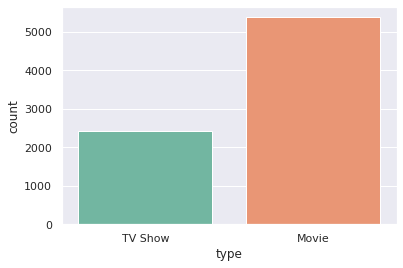

In [7]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data = netflix_overall, palette = 'Set2')

# 넷플릭스 플랫폼은 보유한 영화 콘텐츠가 TV쇼 콘텐츠보다 더 많다. 

### B-2. 적절한 콘텐츠 개봉 시기(월) 파악하기 (콘텐츠 개봉이 최소인 월 찾기)

In [8]:
netflix_date = netfilx_shows[['date_added']].dropna() # date_added : 넷플릭스에 추가된 날짜 
netflix_date

,date_added
0,"August 14, 2020"
5,"July 1, 2017"
11,"November 30, 2018"
12,"May 17, 2019"
16,"March 20, 2019"
...,...
7767,"December 15, 2016"
7775,"August 14, 2020"
7777,"July 1, 2019"
7779,"November 26, 2019"


In [9]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
# lstrip() : 인자가 없을 경우 왼쪽 공백 제거 

In [10]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
# [::-1] : 리스트의 원소를 역순서로 출력 

In [11]:
['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

['December',
 'November',
 'October',
 'September',
 'August',
 'July',
 'June',
 'May',
 'April',
 'March',
 'February',
 'January']

In [12]:
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

**cf.df 생성 단계 살펴보기**

In [13]:
netflix_date.groupby('year')['month'].value_counts()
# 연도별 month 를 count 

year  month    
2008  February      1
2013  October       2
      August        1
      March         1
      September     1
                   ..
2020  November     55
      July         53
      June         48
      February     46
2021  January      29
Name: month, Length: 80, dtype: int64

* **데이터 재구조화**
  * pivot, stack, melt, wide_to_long, crosstab 
  * [stack, unstack](https://rfriend.tistory.com/276)
  * stack() : 데이터셋을 위에서 아래로 (행방향) 쌓음. Series 를 반환 
  * unstack() : 데이터셋을 왼쪽에서 오른쪽으로 (열방향) 쌓음.Series/데이터프레임을 반환

In [14]:
netflix_date.groupby('year')['month'].value_counts().unstack() 

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2008,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,1.0
2014,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2015,4.0,NaN,7.0,1.0,NaN,3.0,3.0,2.0,2.0,2.0,5.0,1.0
2016,8.0,17.0,44.0,7.0,29.0,10.0,8.0,3.0,4.0,18.0,18.0,19.0
2017,29.0,38.0,39.0,18.0,14.0,34.0,30.0,38.0,25.0,31.0,32.0,33.0
2018,31.0,34.0,64.0,24.0,22.0,30.0,28.0,38.0,28.0,41.0,46.0,44.0
2019,50.0,53.0,50.0,46.0,39.0,67.0,48.0,60.0,49.0,77.0,73.0,44.0
2020,58.0,61.0,74.0,46.0,64.0,53.0,48.0,56.0,64.0,55.0,56.0,62.0


In [15]:
netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)
# NaN 을 0으로 채워넣음 

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0
2014,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2015,4.0,0.0,7.0,1.0,0.0,3.0,3.0,2.0,2.0,2.0,5.0,1.0
2016,8.0,17.0,44.0,7.0,29.0,10.0,8.0,3.0,4.0,18.0,18.0,19.0
2017,29.0,38.0,39.0,18.0,14.0,34.0,30.0,38.0,25.0,31.0,32.0,33.0
2018,31.0,34.0,64.0,24.0,22.0,30.0,28.0,38.0,28.0,41.0,46.0,44.0
2019,50.0,53.0,50.0,46.0,39.0,67.0,48.0,60.0,49.0,77.0,73.0,44.0
2020,58.0,61.0,74.0,46.0,64.0,53.0,48.0,56.0,64.0,55.0,56.0,62.0


In [16]:
netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order]
# 12월 --> 1월 순으로 정렬해서 출력 

month,December,November,October,September,August,July,June,May,April,March,February,January
year,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2014,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2015,7.0,2.0,5.0,1.0,0.0,3.0,3.0,2.0,4.0,2.0,1.0,0.0
2016,44.0,18.0,18.0,19.0,17.0,10.0,8.0,4.0,8.0,3.0,7.0,29.0
2017,39.0,31.0,32.0,33.0,38.0,34.0,30.0,25.0,29.0,38.0,18.0,14.0
2018,64.0,41.0,46.0,44.0,34.0,30.0,28.0,28.0,31.0,38.0,24.0,22.0
2019,50.0,77.0,73.0,44.0,53.0,67.0,48.0,49.0,50.0,60.0,46.0,39.0
2020,74.0,55.0,56.0,62.0,61.0,53.0,48.0,64.0,58.0,56.0,46.0,64.0


In [17]:
netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
# 행과 열의 위치를 바꿈 

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,39.0,64.0,50.0,74.0,0.0
November,0.0,0.0,3.0,2.0,18.0,31.0,41.0,77.0,55.0,0.0
October,0.0,2.0,0.0,5.0,18.0,32.0,46.0,73.0,56.0,0.0
September,0.0,1.0,0.0,1.0,19.0,33.0,44.0,44.0,62.0,0.0
August,0.0,1.0,0.0,0.0,17.0,38.0,34.0,53.0,61.0,0.0
July,0.0,0.0,0.0,3.0,10.0,34.0,30.0,67.0,53.0,0.0
June,0.0,0.0,0.0,3.0,8.0,30.0,28.0,48.0,48.0,0.0
May,0.0,0.0,0.0,2.0,4.0,25.0,28.0,49.0,64.0,0.0
April,0.0,0.0,1.0,4.0,8.0,29.0,31.0,50.0,58.0,0.0


[matplotlib을 이용한 히트맵 그리기 (Heatmap by matplotlib)](https://rfriend.tistory.com/419)

* plt.pcolor() 함수를 이용해 히트맵을 그리고, plt.colorbar() 로 색생에 대한 정보를 오른쪽에 제시한다. 
* seaborn 을 이용해 히트맵을 그릴수도 있다. (자주 사용하는 방법) 

findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


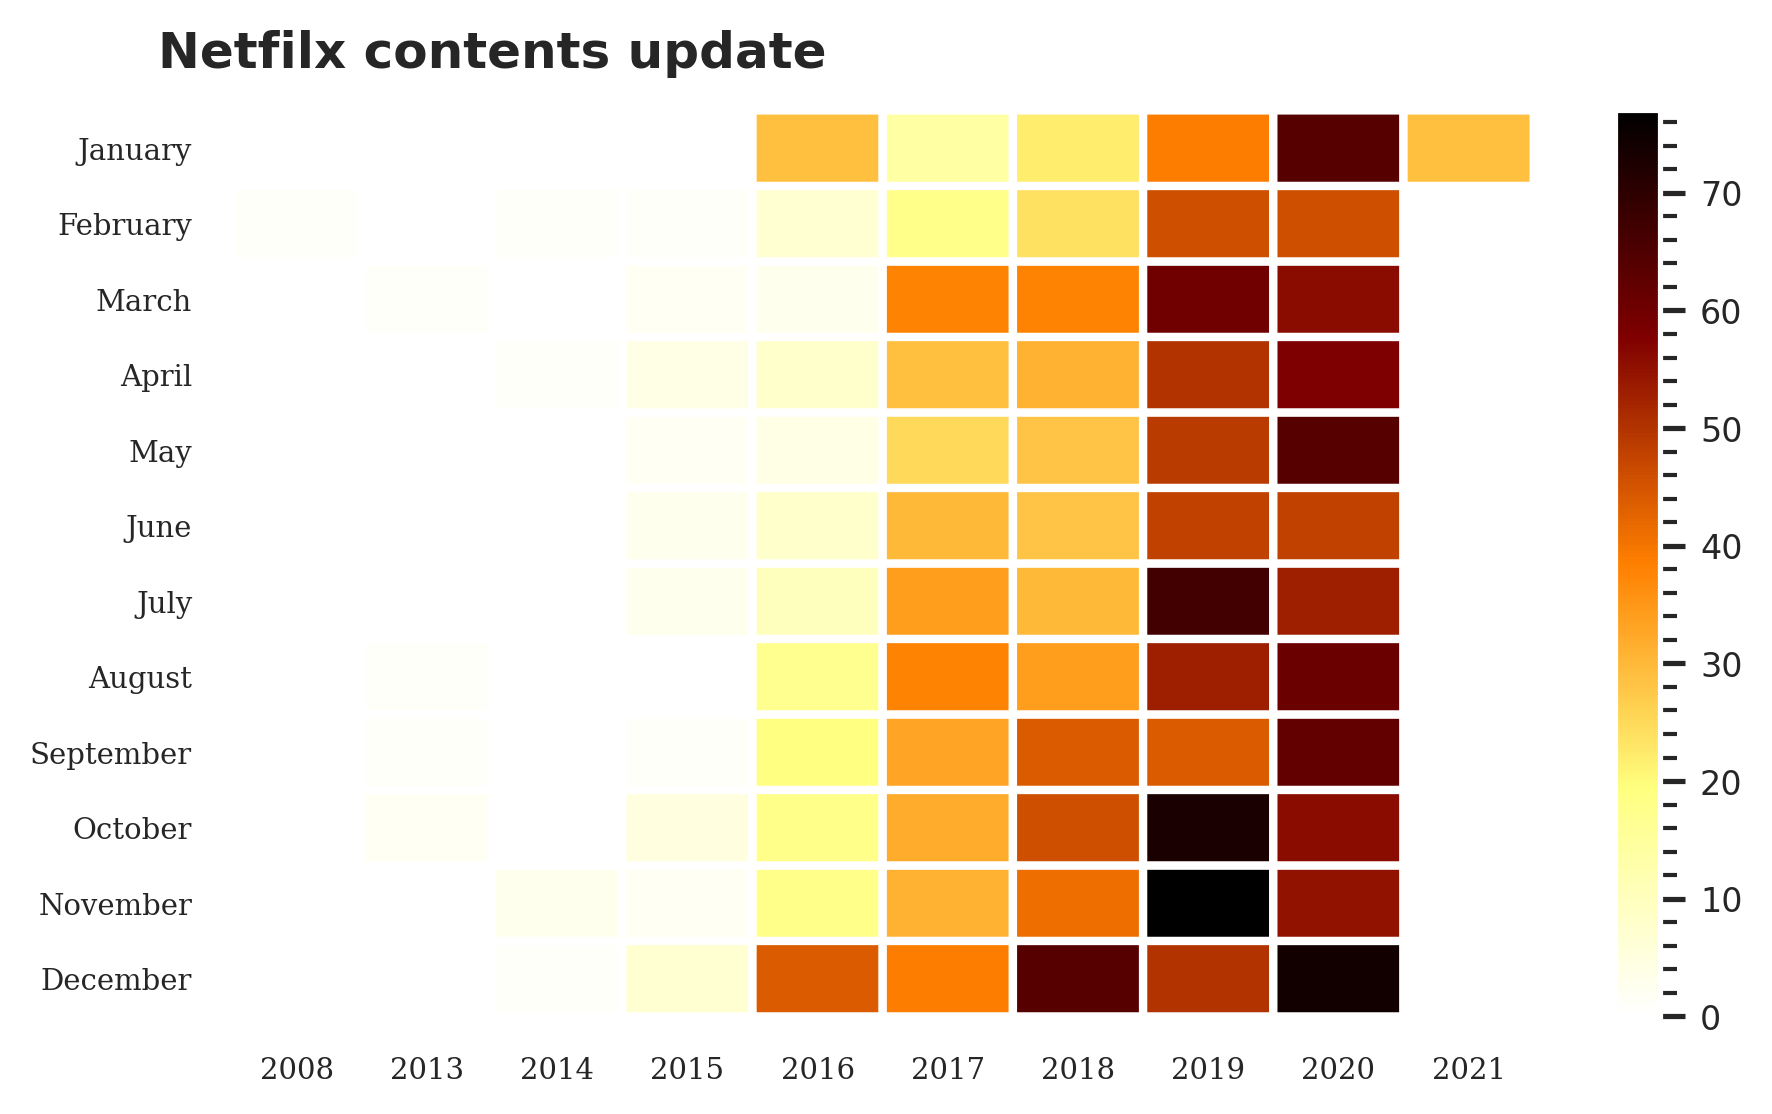

In [18]:
# 시각화 
plt.figure(figsize=(7,4), dpi = 300) # dpi : 고해상도로 그래프를 출력하도록 하는 옵션 (기본값 : 100)

plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
# plt.pcolor(df) 

plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize = 7, fontfamily = 'serif') # X축 눈금 표기 : month
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize = 7, fontfamily = 'serif' ) # Y축 눈금표기 : year

plt.title('Netfilx contents update', fontsize=12, fontfamily='calibri', fontweight = 'bold', position=(0.20, 1.0+0.02))

cbar = plt.colorbar() 

cbar.ax.tick_params(labelsize=8) # 눈금 스타일 설정 
cbar.ax.minorticks_on() # 축에 작은 눈금 표시 
plt.show()

# 2019년을 기준으로 보면, 1월과 12월달에 상대적으로 적은 콘텐츠가 출시되므로 연말/연초에 release 를 하는 것이 좋을 것 같다.

### B-3. 영화 시청등급 분석 

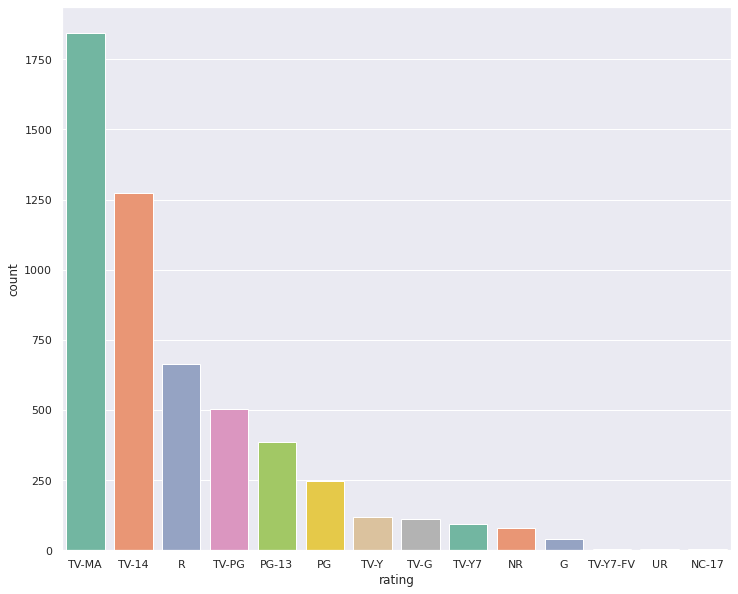

In [19]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(x='rating', data = netflix_movies, palette = 'Set2', 
                   order = netflix_movies['rating'].value_counts().index[0:15])

# TV-MA (성인연령제한 등급) 가 가장 많다. 다음으로 TV-14(14세 이하 연령제한 등급)이 두번째로 많았다. 
# R (17세 이하의 어린이가 시청하기 위해선 보호자 동시시청이 필요) 등급이 세번째로 많았다. 

### B-4. IMDB ratings to get top rated movies on Netflix 

In [20]:
imdb_ratings = pd.read_csv('IMDb ratings.csv', usecols = ['weighted_average_vote'])
imdb_titles = pd.read_csv('IMDb movies.csv', usecols=['title', 'year','genre'])
ratings = pd.DataFrame({"Title" : imdb_titles.title, # 영화 제목
                        'Release Year' : imdb_titles.year, # 개봉연도
                        'Rating' : imdb_ratings.weighted_average_vote, # 평점
                        'Genre' : imdb_titles.genre}) # 장르 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
ratings.isnull().sum()

Title           0
Release Year    0
Rating          0
Genre           0
dtype: int64

In [22]:
ratings[~ratings.index.isin(ratings.drop_duplicates(subset = ['Title', 'Release Year', 'Rating']).index)]

,Title,Release Year,Rating,Genre
36231,Don Chisciotte,1933,6.5,"Adventure, Drama"
55067,Blackout,2008,5.0,"Mystery, Thriller"
60405,High School Musical: El Desafío,2008,3.6,"Comedy, Drama, Family"


In [23]:
# 실제로 중복값이 제거되는지를 직접 확인해보자 
ratings[ratings.Title == 'Blackout']
# 50696과 55067이 Title, Release Year, Rating 이 겹침 

,Title,Release Year,Rating,Genre
6410,Blackout,1950,5.7,"Crime, Drama, Mystery"
30419,Blackout,1997,5.5,"Drama, Mystery, Thriller"
50369,Blackout,2007,5.8,Drama
50696,Blackout,2008,5.0,"Horror, Mystery, Thriller"
55067,Blackout,2008,5.0,"Mystery, Thriller"
65752,Blackout,2013,3.0,Thriller


In [24]:
ratings.drop_duplicates(subset = ['Title', 'Release Year', 'Rating'], inplace=True) # 중복 행 제거 
# keep 옵션 default 값은 'first' : 첫번째 행만 남기고 중복되는 행 모두 제거 
ratings.shape

(85852, 4)

In [25]:
ratings.dropna()
ratings.shape # 모든 행의 값에 대해 na 가 존재하지 않았음 

(85852, 4)

**데이터프레임 병합** : IMDb + Netflix

In [26]:
joint_data = ratings.merge(netflix_overall, left_on = 'Title', right_on='title', how='inner') 
# 영화의 제목을 기준으로 병합 , inner join : 교집합 조인(양쪽에 공통으로 있는 값만 나타내므로 NaN이 없다)
joint_data = joint_data.sort_values(by='Rating', ascending = False)
joint_data.head()

# Rating 은 평점이고
# rating 은 시청연령등급 

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
991,Innocent,2017,9.0,Comedy,s3009,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
1002,Breakout,2019,9.0,"Adventure, Comedy, Drama",s1093,TV Show,Breakout,NaN,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",NaN,"July 1, 2017",2010,TV-14,1 Season,"International TV Shows, TV Dramas",After losing her family in a suspicious car cr...
398,Pulp Fiction,1994,8.9,"Crime, Drama",s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
380,Schindler's List,1993,8.9,"Biography, Drama, History",s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
1301,Inception,2010,8.8,"Action, Adventure, Sci-Fi",s2980,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru..."


In [27]:
print('넷플릭스 전체 작품 수 : ',netflix_overall.shape)
print('IMDb 전체 작품 수 : ',ratings.shape)
print('IMDb 에 존재하는 넷플릭스 작품 수 : ',joint_data.shape)


넷플릭스 전체 작품 수 :  (7787, 12)
IMDb 전체 작품 수 :  (85852, 4)
IMDb 에 존재하는 넷플릭스 작품 수 :  (2739, 16)


**넷플릭스에 있는 영화중 가장 IMDb 평점이 높은 10개 영화 시각화**

In [28]:
import plotly.express as px # 액티비티한 그래프 그리는 라이브러리 

top_rated = joint_data[0:10]
fig = px.sunburst( # px.sunburst : 계층적 데이터 시각화에 사용된다. ex. 대륙 - 나라 - 시도 
    top_rated, 
    path = ['title','country'],
    values = 'Rating',
    color = 'Rating'
)

fig.show() # 인도 영화가 평점이 높은 작품들로 분포해 있다. 

**넷플릭스 영화 중 IMDb 에 등록되어있는 작품에서, 국가별 작품 개수 상위 10개 시각화**

In [29]:
country_count = joint_data['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,799
India,701
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33
"United Kingdom, United States",31


In [30]:
country_count # 299개 나라 중 상위 10개 나라만 시각화 

# 국가가 여러개 등록되어있는 리스트는 단일 국가로 count 되지 않은 문제 --> B-6 에서 해결함 

,country
United States,799
India,701
United Kingdom,107
Canada,56
Philippines,50
...,...
"Canada, United States, France",1
"United States, Norway, Canada",1
"India, Pakistan",1
"India, Australia",1


In [31]:
country_count.country.sum()

2693

In [32]:
data = dict(
    number = topcountries.country,
    country = topcountries.index
)
fig = px.funnel(data, x = 'number', y='country') 
# px.funnel 깔대기형 차트 : 점진적으로 증가하거나 감소하는 경향을 시각화할 때 많이 사용 (주로 백분율 값으로 시각화)
fig.show()

### B-5. 영화 개봉연도 분석

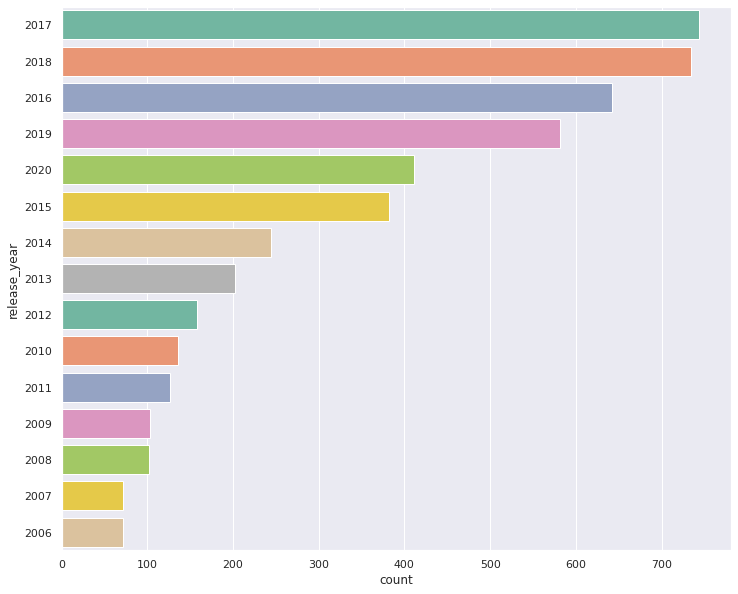

In [33]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data = netflix_movies, palette = 'Set2', 
                   order = netflix_movies['release_year'].value_counts().index[0:15])

# 2017 년도에 개봉한 영화가 넷플릭스에 가장 많이 존재한다. 

### B-6. Top 10 movie content creating countries (제작 국가 분석)


In [34]:
netflix_movies.shape

(5377, 12)

In [35]:
netflix_movies['country'].unique()[:100] # 영화 한 작품에 여러 제작국가가 포함되어있는 경우도 있음 
# ex. 'United States, Germany'

array(['Mexico', 'Singapore', 'United States', 'Egypt', 'India',
       'Thailand', 'Nigeria', 'Norway, Iceland, United States',
       'United Kingdom', 'South Korea', 'Italy', 'Canada', 'Indonesia',
       'Romania', 'Spain', 'Turkey', 'Iceland', 'South Africa, Nigeria',
       'France', 'United States, South Africa', 'Portugal, Spain', nan,
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Japan', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Mexico, United States', 'United States, China',
       'China, Hong Kong', 'United States, United Kingdom', 'Taiwan',
       'France, South Korea, Japan', 'United States, Canada',
       'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, United States',
       'Denmark', 'Hong Kong', 'France, Netherlands, Singa

In [36]:
countries = {}

netflix_movies['country'] = netflix_movies['country'].fillna('Unknown') # 널값 채워넣기 
cou = list(netflix_movies['country'])

for i in cou : # ex. i = 'Brazil, Netherlands, United States, Colombia, Austria, Germany'

  i = list(i.split(','))

  if len(i) == 1 : # 한 영화당 제작국가가 한개면 
    if i in list(countries.keys()) : # dict 에 이미 존재하는 국가면 
      countries[i] += 1 # count +1 
    else : 
      countries[i[0]] = 1 # dict 에 존재하지 않으면 국가를 key 로 등록
  
  else : # 제작 국가가 여러개면 
    for j in i : 
      if j in list(countries.keys()) : 
        countries[j]+=1
      else : 
        countries[j] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
len(countries) # 177개국  : ('': 4) 는 제외 

178

In [38]:
countries.items()

dict_items([('Mexico', 1), ('Singapore', 3), ('United States', 1), ('Egypt', 1), ('India', 1), ('Thailand', 1), ('Nigeria', 1), ('Norway', 2), (' Iceland', 4), (' United States', 331), ('United Kingdom', 2), ('South Korea', 1), ('Italy', 1), ('Canada', 3), ('Indonesia', 1), ('Romania', 3), ('Spain', 1), ('Turkey', 1), ('Iceland', 1), ('South Africa', 1), (' Nigeria', 5), ('France', 4), (' South Africa', 14), ('Portugal', 2), (' Spain', 39), ('Unknown', 1), ('Hong Kong', 1), (' China', 54), (' Singapore', 8), (' Germany', 89), ('Argentina', 2), (' France', 128), (' Serbia', 4), ('Germany', 3), ('Denmark', 2), (' Poland', 9), ('Poland', 1), ('Japan', 2), ('Kenya', 2), ('New Zealand', 2), (' United Kingdom', 126), ('Pakistan', 1), ('Australia', 1), ('China', 1), (' Hong Kong', 23), ('Taiwan', 1), (' South Korea', 13), (' Japan', 28), (' Canada', 111), ('Netherlands', 1), (' Denmark', 12), (' Netherlands', 17), ('Philippines', 1), ('United Arab Emirates', 2), ('Brazil', 1), ('Iran', 1), ('

In [39]:
countries_fin = {}

for country, no in countries.items() : 
  country = country.replace(' ','') # 국가명에 공백 없애기 : United States ---> UnitedStates
  if country in list(countries_fin.keys()) : 
    countries_fin[country] += no
  else : 
    countries_fin[country] = no

countries_fin.items()

dict_items([('Mexico', 23), ('Singapore', 11), ('UnitedStates', 332), ('Egypt', 5), ('India', 33), ('Thailand', 5), ('Nigeria', 6), ('Norway', 11), ('Iceland', 5), ('UnitedKingdom', 128), ('SouthKorea', 14), ('Italy', 26), ('Canada', 114), ('Indonesia', 4), ('Romania', 5), ('Spain', 40), ('Turkey', 3), ('SouthAfrica', 15), ('France', 132), ('Portugal', 4), ('Unknown', 1), ('HongKong', 24), ('China', 55), ('Germany', 92), ('Argentina', 16), ('Serbia', 7), ('Denmark', 14), ('Poland', 10), ('Japan', 30), ('Kenya', 4), ('NewZealand', 9), ('Pakistan', 3), ('Australia', 29), ('Taiwan', 4), ('Netherlands', 18), ('Philippines', 4), ('UnitedArabEmirates', 17), ('Brazil', 8), ('Iran', 4), ('Belgium', 69), ('Israel', 7), ('Uruguay', 7), ('Bulgaria', 5), ('Chile', 8), ('Colombia', 5), ('Algeria', 2), ('SovietUnion', 3), ('Sweden', 22), ('Malaysia', 3), ('Ireland', 9), ('Luxembourg', 10), ('Austria', 4), ('Peru', 6), ('Senegal', 2), ('Switzerland', 12), ('Ghana', 1), ('SaudiArabia', 3), ('Armenia',

**dictionary sorted**

In [40]:
sorted(countries_fin.items(), key = lambda x : x[1], reverse = True)
# count 수를 기준으로 정렬 

[('UnitedStates', 332),
 ('France', 132),
 ('UnitedKingdom', 128),
 ('Canada', 114),
 ('Germany', 92),
 ('Belgium', 69),
 ('China', 55),
 ('Spain', 40),
 ('India', 33),
 ('Japan', 30),
 ('Australia', 29),
 ('Italy', 26),
 ('HongKong', 24),
 ('Mexico', 23),
 ('Sweden', 22),
 ('Netherlands', 18),
 ('UnitedArabEmirates', 17),
 ('Argentina', 16),
 ('SouthAfrica', 15),
 ('SouthKorea', 14),
 ('Denmark', 14),
 ('CzechRepublic', 14),
 ('Switzerland', 12),
 ('Singapore', 11),
 ('Norway', 11),
 ('Poland', 10),
 ('Luxembourg', 10),
 ('NewZealand', 9),
 ('Ireland', 9),
 ('Brazil', 8),
 ('Chile', 8),
 ('Russia', 8),
 ('Greece', 8),
 ('Serbia', 7),
 ('Israel', 7),
 ('Uruguay', 7),
 ('Jordan', 7),
 ('Finland', 7),
 ('Lebanon', 7),
 ('Qatar', 7),
 ('Nigeria', 6),
 ('Peru', 6),
 ('Morocco', 6),
 ('Egypt', 5),
 ('Thailand', 5),
 ('Iceland', 5),
 ('Romania', 5),
 ('Bulgaria', 5),
 ('Colombia', 5),
 ('Hungary', 5),
 ('Indonesia', 4),
 ('Portugal', 4),
 ('Kenya', 4),
 ('Taiwan', 4),
 ('Philippines', 4),
 (

In [41]:
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}
countries_fin.items()

dict_items([('UnitedStates', 332), ('France', 132), ('UnitedKingdom', 128), ('Canada', 114), ('Germany', 92), ('Belgium', 69), ('China', 55), ('Spain', 40), ('India', 33), ('Japan', 30), ('Australia', 29), ('Italy', 26), ('HongKong', 24), ('Mexico', 23), ('Sweden', 22), ('Netherlands', 18), ('UnitedArabEmirates', 17), ('Argentina', 16), ('SouthAfrica', 15), ('SouthKorea', 14), ('Denmark', 14), ('CzechRepublic', 14), ('Switzerland', 12), ('Singapore', 11), ('Norway', 11), ('Poland', 10), ('Luxembourg', 10), ('NewZealand', 9), ('Ireland', 9), ('Brazil', 8), ('Chile', 8), ('Russia', 8), ('Greece', 8), ('Serbia', 7), ('Israel', 7), ('Uruguay', 7), ('Jordan', 7), ('Finland', 7), ('Lebanon', 7), ('Qatar', 7), ('Nigeria', 6), ('Peru', 6), ('Morocco', 6), ('Egypt', 5), ('Thailand', 5), ('Iceland', 5), ('Romania', 5), ('Bulgaria', 5), ('Colombia', 5), ('Hungary', 5), ('Indonesia', 4), ('Portugal', 4), ('Kenya', 4), ('Taiwan', 4), ('Philippines', 4), ('Iran', 4), ('Austria', 4), ('', 4), ('Cambo

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'France'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Japan')]

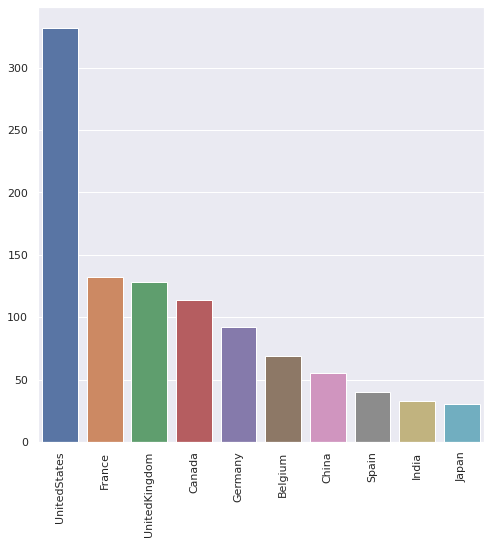

In [42]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10], y=list(countries_fin.values())[0:10]) # x : 국가명, y : count
ax.set_xticklabels(list(countries_fin.keys())[0:10], rotation = 90)

### B-7. 영화 러닝타임 분석

In [43]:
netflix_movies['duration']

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5377, dtype: object

In [44]:
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')
netflix_movies['duration'] = netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration'] # min 을 없애고, 수치형 변수로 변환 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

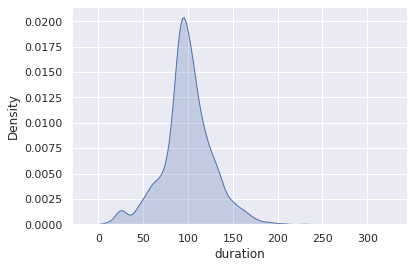

In [45]:
sns.set(style='darkgrid')
sns.kdeplot(data = netflix_movies['duration'], shade=True)

# 넷플릭스에 있는 대부분의 영화들의 러닝타임은 75분~120분 이다. 3시간 이상이 되는 콘텐츠는 거의 없다.  

### B-8. 영화 장르 분석

In [46]:
netflix_movies['listed_in'] # 장르 

1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
6                     Horror Movies, International Movies
                              ...                        
7781                   Children & Family Movies, Comedies
7782                         Dramas, International Movies
7783       Dramas, International Movies, Music & Musicals
7784    Documentaries, International Movies, Music & M...
7786                      Documentaries, Music & Musicals
Name: listed_in, Length: 5377, dtype: object

In [47]:
from collections import Counter # 문자열이나 list 의 요소를 카운팅하여 많은 순으로 딕셔너리 형태로 리턴한다. 

genres = list(netflix_movies['listed_in'])
gen = []

for i in genres : 
  i = list(i.split(','))
  for j in i : 
    gen.append(j.replace(' ',''))

gen[:10]

['Dramas',
 'InternationalMovies',
 'HorrorMovies',
 'InternationalMovies',
 'Action&Adventure',
 'IndependentMovies',
 'Sci-Fi&Fantasy',
 'Dramas',
 'HorrorMovies',
 'InternationalMovies']

In [48]:
g = Counter(gen)
g

Counter({'Action&Adventure': 721,
         'AnimeFeatures': 57,
         'Children&FamilyMovies': 532,
         'ClassicMovies': 103,
         'Comedies': 1471,
         'CultMovies': 59,
         'Documentaries': 786,
         'Dramas': 2106,
         'Faith&Spirituality': 57,
         'HorrorMovies': 312,
         'IndependentMovies': 673,
         'InternationalMovies': 2437,
         'LGBTQMovies': 90,
         'Movies': 56,
         'Music&Musicals': 321,
         'RomanticMovies': 531,
         'Sci-Fi&Fantasy': 218,
         'SportsMovies': 196,
         'Stand-UpComedy': 329,
         'Thrillers': 491})

**워드클라우드 시각화**

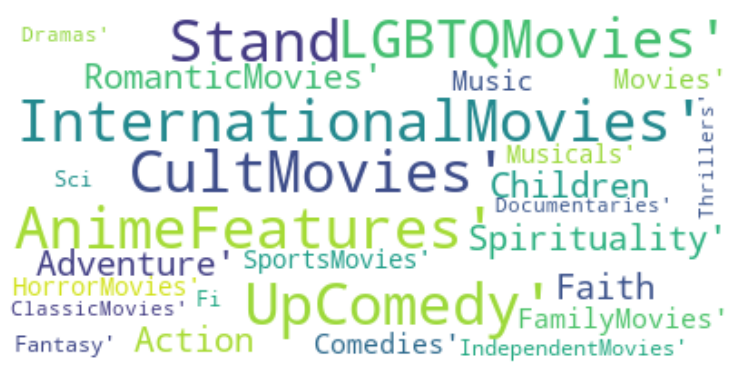

In [49]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13,13) 

wordcloud = WordCloud(max_words = 100000, background_color='white').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**롤리팝 plot 시각화**

Text(0.5, 1.0, 'Genres')

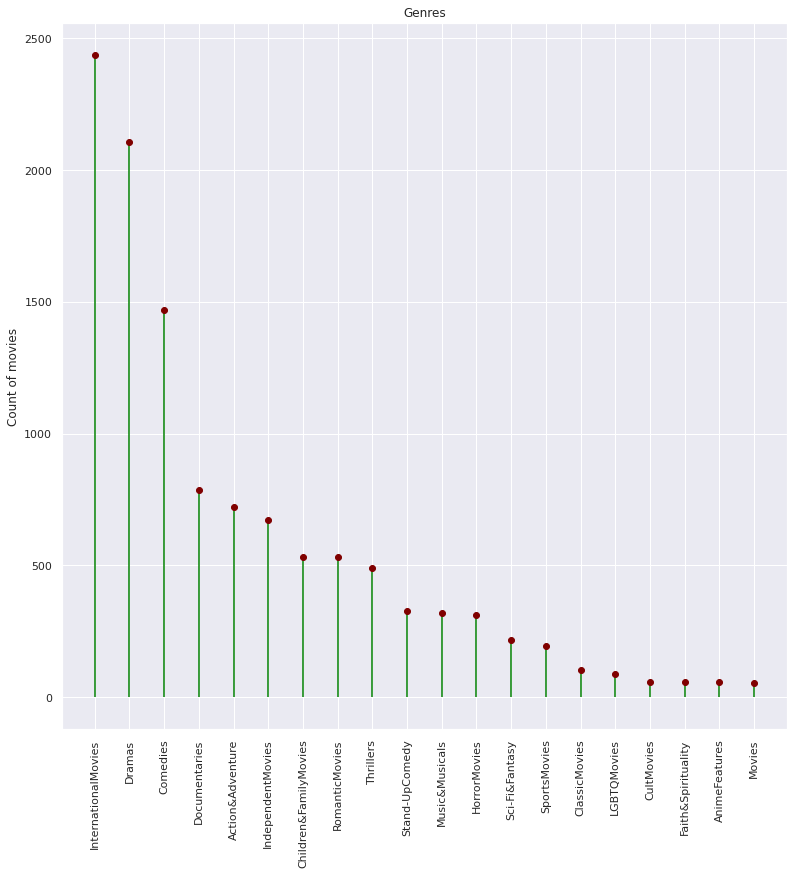

<Figure size 720x720 with 0 Axes>

In [50]:
g = {k:v for k,v in sorted(g.items() , key = lambda item : item[1], reverse=True)}

fig,ax = plt.subplots()

fig = plt.figure(figsize=(10,10))

x = list(g.keys()) # 장르
y = list(g.values()) # count

# 롤리팝 시각화 
ax.vlines(x, ymin = 0, ymax = y , color = 'green') # 수직선 
ax.plot(x,y, 'o', color = 'maroon') # 원

ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel('Count of movies')
ax.set_title('Genres')

# 넷플릭스 콘텐츠 중 가장 많이 분포하는 장르의 종류는 international , drama , comedy 순으로 가장 많다. 

### B-9. TV series on Nefix 분석 : 제작 국가 

In [54]:
countries_1 = {}

netfilx_shows['country'] = netfilx_shows['country'].fillna('Unknown')
cou_1 = list(netfilx_shows['country'])
for i in cou_1: 
  i = list(i.split(','))
  if len(i) == 1 : 
    if i in list((countries_1.keys())) :
      countries_1[i] +=1 
    else : 
      countries_1[i[0]] = 1 
  else : 
    for j in i : 
      if j in list(countries_1.keys()) : 
        countries_1[j] += 1 
      else : 
        countries_1[j] = 1 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
print(countries_1)

{'Brazil': 1, 'Turkey': 1, 'Poland': 1, ' United States': 83, 'Mexico': 1, 'Unknown': 1, 'Japan': 1, 'United States': 2, 'South Korea': 1, 'United Kingdom': 1, 'India': 1, 'Canada': 2, 'Italy': 2, 'Spain': 1, 'Australia': 1, 'Taiwan': 1, 'China': 1, 'Germany': 1, 'France': 1, ' Canada': 42, 'Singapore': 1, ' France': 25, ' Russia': 2, 'Mauritius': 1, ' South Africa': 5, 'Lebanon': 1, 'Colombia': 1, 'Argentina': 2, 'Philippines': 1, 'Finland': 3, 'Netherlands': 1, 'Chile': 1, 'Thailand': 1, 'Russia': 1, 'Nigeria': 1, ' China': 7, ' Japan': 22, 'Saudi Arabia': 1, ' Syria': 1, ' Egypt': 1, ' Lebanon': 1, ' Kuwait': 1, ' Belgium': 3, 'South Africa': 1, 'Norway': 1, 'Sweden': 1, ' Germany': 18, ' Sweden': 3, 'Denmark': 1, ' United Kingdom': 20, ' Australia': 8, ' Israel': 1, ' Italy': 6, 'Ireland': 2, 'Iceland': 1, 'Indonesia': 1, 'Malaysia': 1, ' New Zealand': 6, ' Spain': 8, ' Brazil': 2, 'New Zealand': 1, 'Egypt': 1, ' South Korea': 5, ' Chile': 1, ' Mexico': 9, ' Colombia': 5, 'Czech Re

In [59]:
countries_fin1={}
for country,no in countries_1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

In [61]:
print(countries_fin1)

{'UnitedStates': 85, 'Canada': 44, 'France': 26, 'Japan': 23, 'UnitedKingdom': 21, 'Germany': 19, 'Mexico': 10, 'Spain': 9, 'Australia': 9, 'Italy': 8, 'China': 8, 'Ireland': 8, 'NewZealand': 7, 'SouthKorea': 6, 'SouthAfrica': 6, 'Colombia': 6, 'CzechRepublic': 6, 'Singapore': 4, 'Finland': 4, 'Netherlands': 4, 'Belgium': 4, 'Sweden': 4, 'Brazil': 3, 'India': 3, 'Russia': 3, 'Denmark': 3, 'HongKong': 3, 'Poland': 2, 'Lebanon': 2, 'Argentina': 2, 'Chile': 2, 'Egypt': 2, 'Kuwait': 2, 'Israel': 2, 'Indonesia': 2, 'Malaysia': 2, 'Greece': 2, 'WestGermany': 2, 'Turkey': 1, 'Unknown': 1, 'Taiwan': 1, 'Mauritius': 1, 'Philippines': 1, 'Thailand': 1, 'Nigeria': 1, 'SaudiArabia': 1, 'Syria': 1, 'Norway': 1, 'Iceland': 1, 'Cuba': 1, 'Austria': 1, 'Pakistan': 1, 'Luxembourg': 1, 'Jordan': 1, 'Uruguay': 1, 'Azerbaijan': 1, 'PuertoRico': 1, 'Malta': 1, 'Senegal': 1, 'Ukraine': 1, 'Switzerland': 1, 'Belarus': 1, 'Cyprus': 1, 'Hungary': 1, 'Croatia': 1, 'UnitedArabEmirates': 1}


Text(0, 0.5, 'Arrival delay (in minutes)')

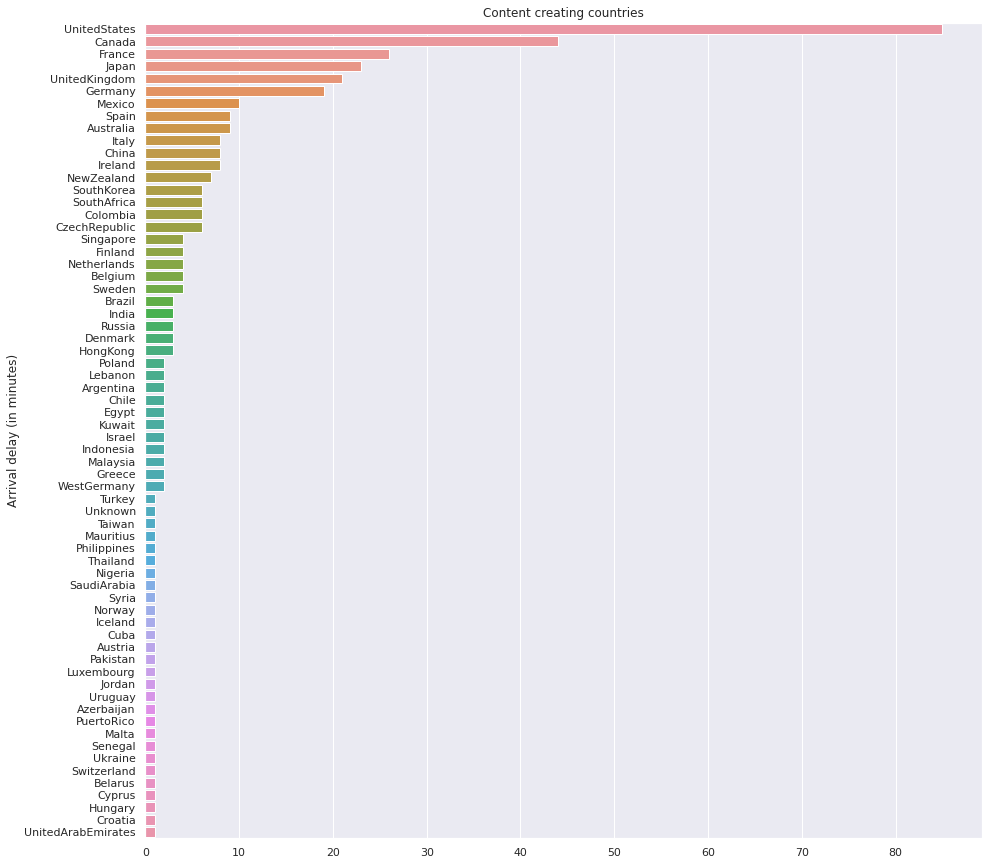

In [62]:
plt.figure(figsize=(15,15))

plt.title('Content creating countries')

sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

plt.ylabel('Arrival delay (in minutes)')

# 넷플릭스의 TV 프로그램 쇼 시리즈를 가장 많이 제작한 국가는 United Stated 이다. 

### B-10. TV series on Nefix 분석 : 시즌 수 

In [64]:
netfilx_shows['duration'] # 시즌 수 

0       4 Seasons
5        1 Season
11       1 Season
12       1 Season
16       1 Season
          ...    
7767     1 Season
7775     1 Season
7777    2 Seasons
7779     1 Season
7785     1 Season
Name: duration, Length: 2410, dtype: object

In [ ]:
feature = ['title','duration']
durations = netfilx_shows[feature]

durations['no_of_seasons'] = durations['duration'].str.replace('Season', '') 
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s','') # Seasons 로 끝나는 부분 때문 
durations['no_of_seasons'] = durations['no_of_seasons'].astype(str).astype(int) # 수치형으로 변환 

In [67]:
t = ['title', 'no_of_seasons']
top = durations[t]

top = top.sort_values(by = 'no_of_seasons', ascending = False)
top # Grey's Anatomy 라는 TV 드라마의 시즌 수가 가장 많다(16시즌까지 방영)

,title,no_of_seasons
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
5137,Red vs. Blue,13
...,...,...
4243,Move,1
1526,Crazyhead,1
1533,Cricket Fever: Mumbai Indians,1
4228,Mortel,1


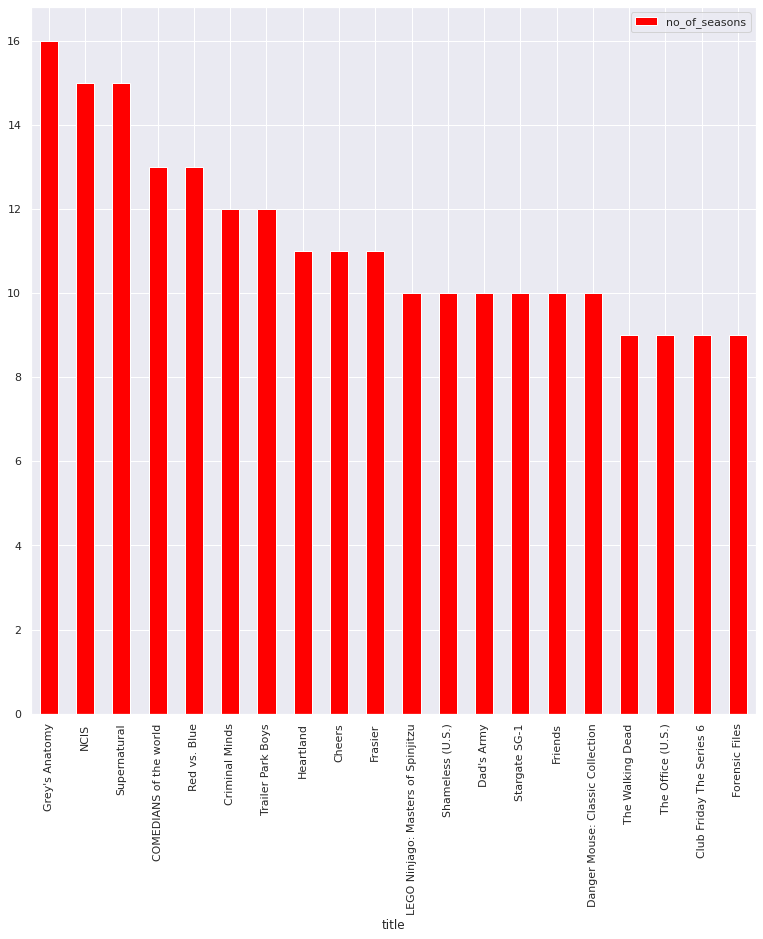

In [68]:
# 시즌 개수 상위 20개 시각화 
top20 = top[0:20]
top20.plot(kind = 'bar', x = 'title', y = 'no_of_seasons', color = 'red')

# Grey's Anatomy (미국 방송사 ABC 의학 드라마), NCIS (미국 수사물 드라마), Supernatural(미국 미스터리물) 작품이 가장 많은 시즌수를 보유하고 있다. 

[Tables in python](https://pdatinmylife.tistory.com/entry/%EB%B6%80%EB%8F%99%EC%82%B02Plotly-%EA%B2%BD%EA%B8%B0%EB%8F%84-%EB%AF%B8%EB%B6%84%EC%96%91-%EC%95%84%ED%8C%8C%ED%8A%B8-%ED%98%84%ED%99%A9-goTable-Plotly-%ED%91%9C-%EB%A7%8C%EB%93%A4%EA%B8%B0) 

* Plotly 모듈의 Table() 메소드 활용 
  * header : values 에 각 열의 이름을 설정 
  * cells : values 에 각 cell 에 들어갈 값을 지정해준다. 

In [70]:
# 가장 낮은 시즌수 작품 확인
bottom = top.sort_values(by='no_of_seasons') 
bottom = bottom[20:50]

import plotly.graph_objects as go  

fig = go.Figure(data = [go.Table(
                        header = dict(values = ['Title', 'No of seasons']), 
                        cells = dict(values = [bottom['title'], bottom['no_of_seasons']], fill_color='lavender'))
])

fig.show()
# 시즌이 1개인 TV 프로그램 쇼가 많다. 

### B-11. TV series on Nefix 분석 : 장르 워드클라우드 

In [73]:
netfilx_shows['listed_in']

0       International TV Shows, TV Dramas, TV Sci-Fi &...
5         International TV Shows, TV Dramas, TV Mysteries
11      Crime TV Shows, International TV Shows, TV Dramas
12      Crime TV Shows, Docuseries, International TV S...
16                      International TV Shows, TV Dramas
                              ...                        
7767    International TV Shows, Romantic TV Shows, TV ...
7775                               Anime Series, Kids' TV
7777               Kids' TV, Korean TV Shows, TV Comedies
7779    International TV Shows, Spanish-Language TV Sh...
7785                   International TV Shows, Reality TV
Name: listed_in, Length: 2410, dtype: object

In [112]:
genres = list(netfilx_shows['listed_in'])

gen = []

for i in genres : 
  i = list(i.split(','))
  for j in i : 
    gen.append(j.replace(' ',""))

g = Counter(gen)

In [114]:
g

Counter({'AnimeSeries': 148,
         'BritishTVShows': 232,
         'Classic&CultTV': 27,
         'CrimeTVShows': 427,
         'Docuseries': 353,
         'InternationalTVShows': 1199,
         "Kids'TV": 414,
         'KoreanTVShows': 150,
         'RealityTV': 222,
         'RomanticTVShows': 333,
         'Science&NatureTV': 85,
         'Spanish-LanguageTVShows': 147,
         'Stand-UpComedy&TalkShows': 52,
         'TVAction&Adventure': 150,
         'TVComedies': 525,
         'TVDramas': 704,
         'TVHorror': 69,
         'TVMysteries': 90,
         'TVSci-Fi&Fantasy': 76,
         'TVShows': 12,
         'TVThrillers': 50,
         'TeenTVShows': 60})

In [98]:
print(sorted(dict(g), key = lambda item : item[1], reverse=True))

['Stand-UpComedy&TalkShows', 'CrimeTVShows', 'BritishTVShows', 'Spanish-LanguageTVShows', 'Docuseries', 'RomanticTVShows', 'KoreanTVShows', 'InternationalTVShows', 'AnimeSeries', 'Classic&CultTV', "Kids'TV", 'RealityTV', 'TeenTVShows', 'Science&NatureTV', 'TVDramas', 'TVSci-Fi&Fantasy', 'TVMysteries', 'TVComedies', 'TVAction&Adventure', 'TVShows', 'TVHorror', 'TVThrillers']


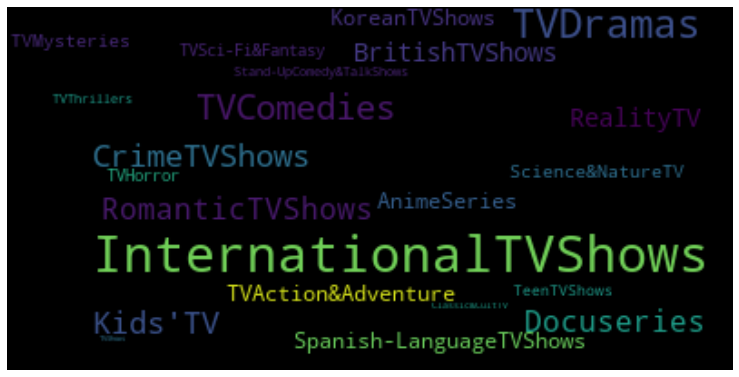

In [115]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # mask 는 생략 

#text = list(set(gen)) 
wordcloud = WordCloud(max_words=1000000,background_color="black").generate_from_frequencies(dict(g)) # 빈도를 기준으로 크기를 결정

# generate_from_frequencies : 미리 정의된 단어의 빈도수 를 이용하여 워드 클라우드를 그림

plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### B-12. Content in Korea

In [103]:
netflix_overall[netflix_overall['country']=='South Korea'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ..."
51,s52,TV Show,100 Days My Prince,NaN,"Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...",South Korea,"December 7, 2020",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Upon losing his memory, a crown prince encount..."
61,s62,TV Show,12 Years Promise,NaN,"So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...",South Korea,"May 22, 2017",2014,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A pregnant teen is forced by her family to lea...
81,s82,Movie,2015 Dream Concert,NaN,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...",South Korea,"April 28, 2017",2015,TV-PG,107 min,"International Movies, Music & Musicals",The world's biggest K-pop festival marked its ...
91,s92,Movie,26 Years,Geun-hyun Cho,"Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im...",South Korea,"October 1, 2017",2012,TV-MA,135 min,"Dramas, International Movies, Thrillers",Twenty-six years after the 1980 massacre at Gw...


In [105]:
netflix_kor = netflix_overall[netflix_overall['country']=='South Korea']
netflix_kor.isnull().sum() # director 에 null 값이 많다. 

show_id           0
type              0
title             0
director        139
cast              3
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [107]:
netflix_kor = netflix_kor.dropna()

[트리맵 차트](https://plotly.com/python/treemaps/) 
* 중첩된 사각형을 사용하여 계층적 데이터를 시각화

In [108]:
import plotly.express as px
fig = px.treemap(netflix_kor, path = ['country', 'director'], 
                 color = 'director', hover_data = ['director', 'title'],
                 color_continuous_scale = 'Purples')

fig.show() 
# 한 감독이 최대 2편의 작품을 제작한 것으로 미루어 보아, 넥플릭스 콘텐츠는 다양한 감독에게 제작 기회를 부여한는 것 같다. 

## C. Recommendation : Contents based 

**Tf-idf**

* 단어의 빈도와 역-문서 빈도를 사용해 단어들마다 중요한 정보를 가중치로 계산하는 방법이다. (텍스트를 수치화 벡터로 변환) 즉, 특정 단어의 상대적인 빈도수를 나타내 주는 값이다. 

  * TF-IDF 값을 사용하여 CountVectorizer 의 단점을 보완
  * TF(Term Frequency) : 특정 단어가 하나의 데이터 안에서 등장하는 횟수
  * DF(Document Frequency) : 특정 단어가 여러 데이터에 자주 등장하는지를 알려주는 지표
  * IDF(Inverse Document Frequency) : DF에 역수를 취해(inverse) 구함 
  * TF-DIF : TF 와 IDF 를 곱한 값 


* 해당 단위 안에서는 많이 등장하지만, 다른 문서들 전체에서는 적게 사용될 수록 '분별력 있는 특징' 이라 할 수 있는데, TF-IDF 값이 클수록 분별력있는 단어라고 볼 수 있다. 


* [파라미터](https://chan-lab.tistory.com/27) 

In [118]:
netflix_overall['description']

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7787, dtype: object

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english')

# 널값 대체하기 
netflix_overall['description'] = netflix_overall['description'].fillna('')

tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

tfidf_matrix.shape 

(7787, 17905)

[**Cosine similarity**](https://wikidocs.net/24603) 
* 작품간 유사도 계산, 직관적으로 이해하면 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미
* 값이 1에 가까울수록 유사도가 높다고 판단
* 토큰화 후 수치화 된 행렬 - 행렬 간 유사도 계산 by 코사인 유사도 

In [119]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [121]:
cosine_sim

array([[1.        , 0.        , 0.05827946, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
        0.        ],
       [0.05827946, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09600035, 0.        , ..., 1.        , 0.        ,
        0.02819239],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02819239, 0.        ,
        1.        ]])

In [120]:
# 작품 제목
indices = pd.Series(netflix_overall.index, index = netflix_overall['title']).drop_duplicates()

In [122]:
indices

title
3%                                            0
7:19                                          1
23:59                                         2
9                                             3
21                                            4
                                           ... 
Zozo                                       7782
Zubaan                                     7783
Zulu Man in Japan                          7784
Zumbo's Just Desserts                      7785
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    7786
Length: 7787, dtype: int64

In [126]:
list(enumerate(cosine_sim[0]))[:10]

[(0, 0.9999999999999999),
 (1, 0.0),
 (2, 0.058279456783514705),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0)]

In [127]:
def get_recommendations(title, cosine_sim = cosine_sim) : 
  
  idx = indices[title] # 입력한 작품 제목의 index 를 가져옴 

  sim_scores = list(enumerate(cosine_sim[idx])) 
  # 해당 작품과 다른 작품들과의 similarity value 를 가져와 list 로 저장 
  # (작품 index, similarity_value) 형식으로 저장됨 
  
  sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True) # 유사도가 높은 작품 순으로 정렬 

  sim_scores = sim_scores[1:11] # 유사도 상위 10개 작품 가져오기 

  movie_indices = [i[0] for i in sim_scores] # 작품 index 를 저장 

  return netflix_overall['title'].iloc[movie_indices] # 유사도 10개 작품 제목 출력 


In [128]:
get_recommendations('Peaky Blinders')

4692                    Our Godfather
4358                   My Stupid Boss
1807                              Don
6344                         The Fear
3219    Jonathan Strange & Mr Norrell
4953                Power Rangers Zeo
6783                       The Prison
6950                       The Tudors
6236                    The Con Is On
6585     The Legend of Michael Mishra
Name: title, dtype: object

**Content based filtering on multiple metrics**

* Title, Cast, Director, Listed in, Plot 의 다양한 변수 (텍스트 형태) 를 포함해 콘텐츠 기반 필터링 추천 시스템 구현해보기 

In [150]:
filedna = netflix_overall.fillna('') # 널값 채워넣기 
filedna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [151]:
# 소문자로 변환, 공백 없애기 
def clean_data(x) : 
  return str.lower(x)

In [152]:
features=['title','director','cast','listed_in','description']
filedna=filedna[features]

In [153]:
for feature in features : 
  filedna[feature] = filedna[feature].apply(clean_data)

filedna.head(2)

,title,director,cast,listed_in,description
0,3%,,"joão miguel, bianca comparato, michel gomes, r...","international tv shows, tv dramas, tv sci-fi &...",in a future where the elite inhabit an island ...
1,7:19,jorge michel grau,"demián bichir, héctor bonilla, oscar serrano, ...","dramas, international movies",after a devastating earthquake hits mexico cit...


In [154]:
def create_soup(x) :  # 연결 
  return x['title'] + ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [155]:
filedna['soup'] = filedna.apply(create_soup, axis=1)

In [156]:
filedna.head(2)

,title,director,cast,listed_in,description,soup
0,3%,,"joão miguel, bianca comparato, michel gomes, r...","international tv shows, tv dramas, tv sci-fi &...",in a future where the elite inhabit an island ...,"3% joão miguel, bianca comparato, michel gome..."
1,7:19,jorge michel grau,"demián bichir, héctor bonilla, oscar serrano, ...","dramas, international movies",after a devastating earthquake hits mexico cit...,"7:19 jorge michel grau demián bichir, héctor b..."


[CounterVectorizer](https://rueki.tistory.com/23) 

In [157]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english') #  띄어쓰기만을 기준으로 토큰화가 진행
count_matrix = count.fit_transform(filedna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [158]:
filledna=filedna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [159]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [160]:
get_recommendations_new('PK', cosine_sim2)

100             3 idiots
1757      dil chahta hai
5377               sanju
5954    taare zameen par
3120              janaan
4276     mumbai cha raja
4485            no entry
2692       hello brother
3521              lagaan
1758     dil dhadakne do
Name: title, dtype: object

## D. 넷플릭스에 책을 원작으로 한 작품이 몇 개나 있을까 

In [141]:
books = pd.read_csv('books.csv')

books.head(2)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...


In [142]:
books['original_title'] = books['original_title'].str.lower() # 소문자로 변환
x = netflix_overall
x['title'] = x['title'].str.lower() # 소문자로 변환 
# 작품 제목을 기준으로 inner join
t = x.merge(books, left_on = 'title', right_on = 'original_title', how='inner')

In [143]:
t.shape

(289, 35)

In [144]:
netflix_overall.shape

(7787, 12)

In [146]:
import plotly.graph_objects as go 
labels = ['Shows from books', 'Shows not from books'] 
values = [289, 7498]

fig = go.Figure(data = [go.Pie(labels = labels, values = values)])

fig.show() # 넷플릭스 작품의 약 3.71% 가 책을 원작으로 한 작품임을 파악해볼 수 있다. 